In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from src.model import UNet
from src.dataset import get_load_data
from torch.utils.data import DataLoader
from src.predict import predict
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
unet_model = UNet(num_classes=21)
train, test = get_load_data(root = "../../data", dataset = "VOCSegmentation", download = False)  
test_set = DataLoader(test, batch_size=1)

trained_model_path = "../model_weights/model_weights.pt"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))
imgs, smnts = next(iter(test_set))
preds = predict(model, imgs.to(device))

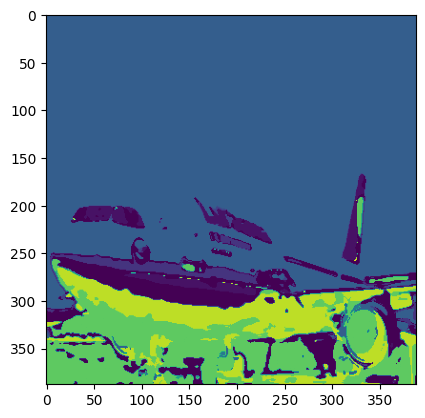

In [11]:
import matplotlib.pyplot as plt 

plt.imshow(preds.squeeze(0).cpu())

In [24]:
# dataloader already converts the PIL to Tensor
# When converting, somehow the pixels go to [0,1] instead of [0, 255]
# need to convert back to [0,255]
imgs, smnts = next(iter(test_set))

# import torchvision.transforms as T
# transform = T.ToPILImage()
# smnts = torch.where(smnts == 255, 0, smnts)
# smnts = transform(smnts.squeeze(0))

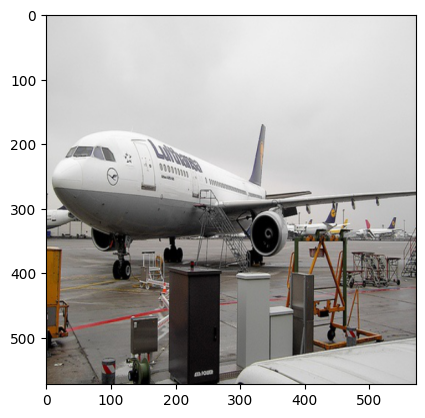

In [13]:
plt.imshow(imgs[0].permute(1,2,0))

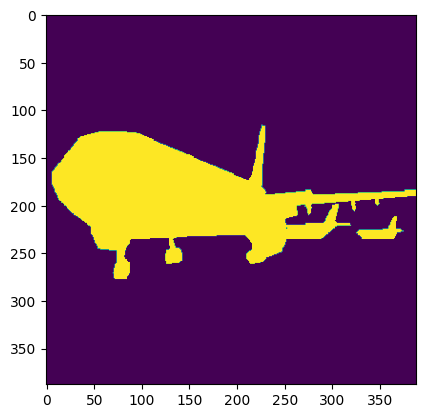

In [31]:
# avoid visualing in PIL?
smnts *= 255
smnts = torch.where(smnts == 255, 0, smnts)
plt.imshow(smnts[0].numpy().squeeze(0))